In [7]:
pip install dabl

  Using cached dabl-0.2.2-py3-none-any.whl (558 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import dabl   #data analysis baseline library
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

- The real strength of dabl is in providing simple interfaces for data exploration
- The idea behind dabl is to jump-start your supervised learning task. dabl has several tools that make it easy to clean and inspect your data, and create strong baseline models.
- Building machine learning models is an inherently iterative task with a human in the loop. Big jumps in performance are often achieved by better understanding of the data and task, and more appropriate features. dabl tries to provide as much insight into the data as possible, and enable interactive analysis.
- Many analyses start with the same rote tasks of cleaning and basic data visualization, and initial modeling. dabl tries to make these steps as easy as possible, so that you can spend your time thinking about the problem and creating more interesting custom analyses.
- There are two main packages that dabl takes inspiration from and that dabl builds upon: scikit-learn and auto-sklearn. The design philosophies and use-cases are quite different, however.
- Scikit-learn provides many essential building blocks, but is built on the idea to do exactly what the user asks for. That requires specifying every step of the processing in detail. dabl on the other hand has a best-guess philosophy: it tries to do something sensible, and then provides tools for the user to inspect and evaluate the results to judge them.
- auto-sklearn is completely automatic and black-box. It searches a vast space of models and constructs complex ensemles of high accuracy, taking a substantial amount of computation and time in the process. The goal of auto-sklearn is to build the best model possible given the data. dabl, conversely, tries to enable the user to quickly iterate and get a grasp on the properties of the data at hand and the fitted models.

In [27]:
data = pd.read_csv(dabl.datasets.data_path('adult.csv.gz'))
data_clean = dabl.clean(data[::10])

- The first step in any data analysis is data cleaning. dabl tries to detect the types of your data and apply appropriate conversions.
- It also tries to detect potential data quality issues. The field of data cleaning is impossibly broad, and dabl’s approaches are by no means sophisticated. The goal of dabl is to get the data “clean enough” to create useful visualizations and models, and to allow users to perform custom cleaning operations themselves.
- In particular if the detection of semantic types (continuous, categorical, ordinal, text, etc) fails, the user can provide type_hints:

In [28]:
data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [29]:
data.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
data_clean = dabl.clean(data, type_hints={"capital-gain": "continuous"})
data_clean

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,20,United-States,<=50K


### EDA

Target looks like classification
Linear Discriminant Analysis training set score: 0.530


/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/syeedakudhsiafatima/opt/anaconda3/lib/pytho

[[<Figure size 432x432 with 6 Axes>,
  <Figure size 576x288 with 2 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

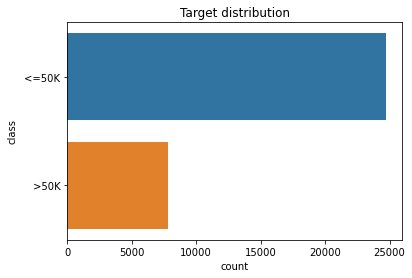

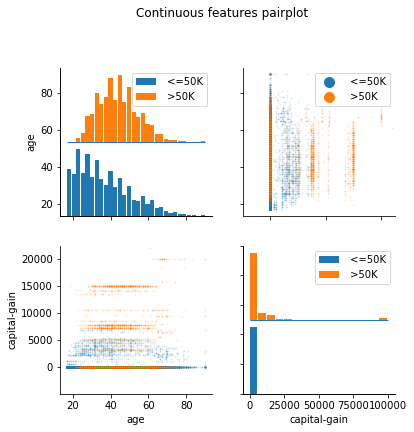

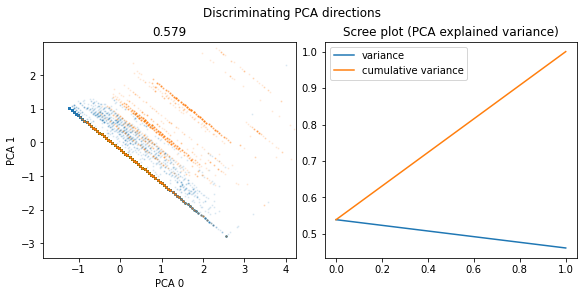

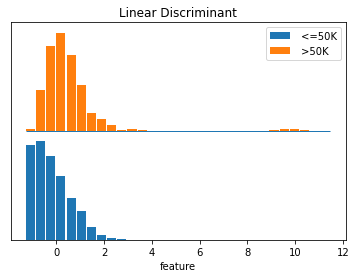

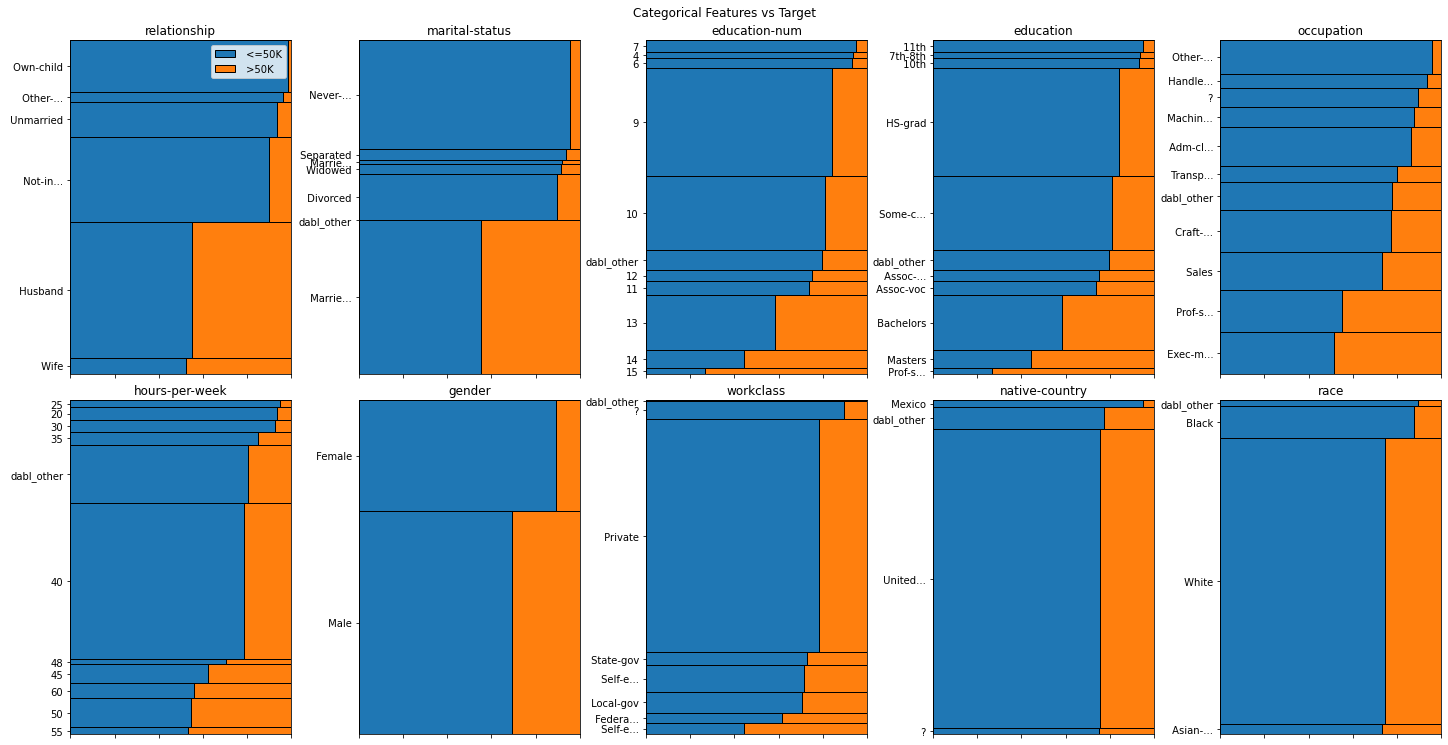

In [31]:
dabl.plot(data, target_col = 'income')

 - dabl provides a high-level interface that summarizes several common high-level plots. For low dimensional datasets, all features are shown; for high dimensional datasets, only the most informative features for the given task are shown.
 - it will give you a quick insight in to what are the important features, their interactions, and how hard the problem might be. 


In [19]:
titanic = pd.read_csv(dabl.datasets.data_path('titanic.csv'))

In [20]:
titanic.shape

(1309, 14)

In [22]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [21]:
titanic_clean = dabl.clean(titanic, verbose=0)

In [23]:
types = dabl.detect_types(titanic_clean)
print(types)

                      continuous  dirty_float  low_card_int  categorical  \
pclass                     False        False         False         True   
survived                   False        False         False         True   
name                       False        False         False        False   
sex                        False        False         False         True   
sibsp                      False        False          True        False   
parch                      False        False          True        False   
ticket                     False        False         False        False   
cabin                      False        False         False        False   
embarked                   False        False         False         True   
boat                       False        False         False         True   
home.dest                  False        False         False        False   
age_?                      False        False         False         True   
age_dabl_con

Columns are labeled as one of the following types:
- continous
- categorical
- low_card_int
- dirty float
- free string
- date
- useless

- pandas categorical variables, strings and integers of low cardinality and float values with 2 coumns are labeled as **categorical.**
- Integers of high cardinality are referred to as **continous.**
- Integers with intermediate cardinality are labeled as **low_card_int.**
- Float variables that sometimes take strings are called as **dirty variable.**
- string variables with many unique values are labeled as **free text.**
- Datatypes labeled as date 
- Anything that is constant, nearly constant, detected as an integer index, or doesn't match any of the above categories is labeled as **useless.**




/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Linear Discriminant Analysis training set score: 0.578


/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/syeedakudhsiafatima/opt/anaconda3/lib/python3.9/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[[<Figure size 1080x1080 with 30 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

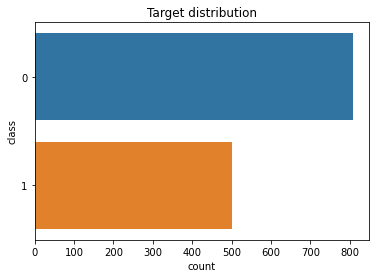

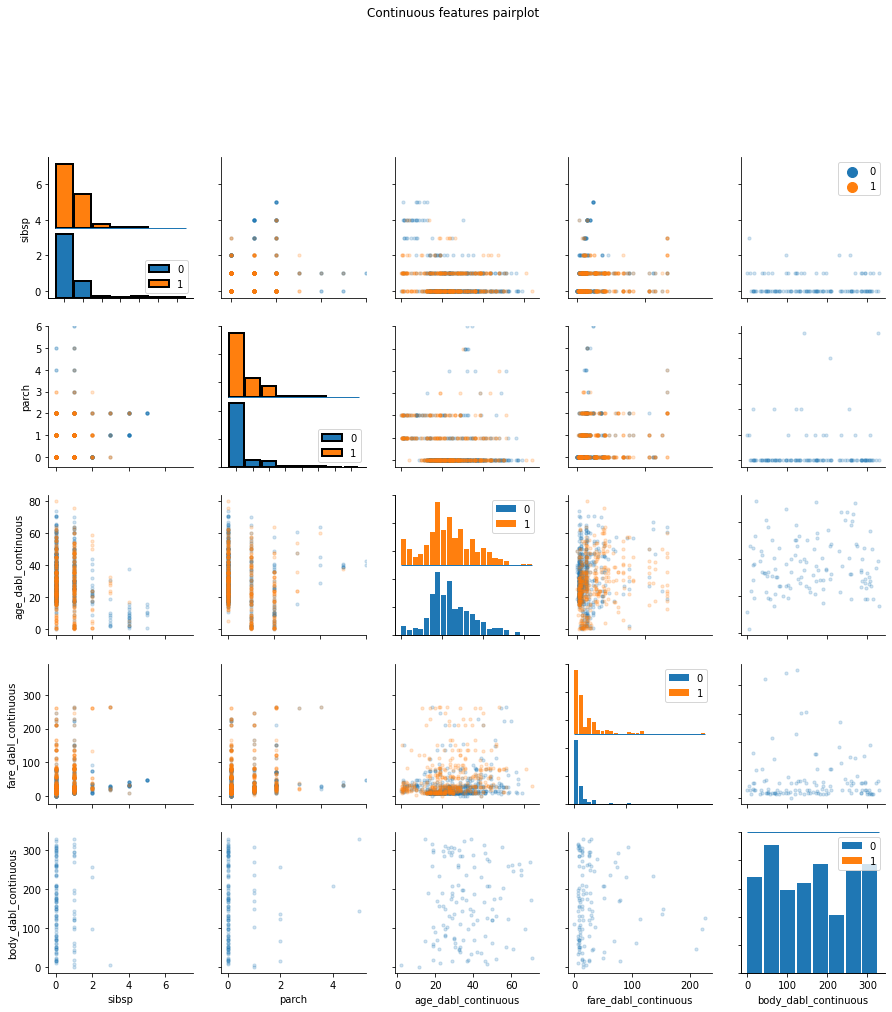

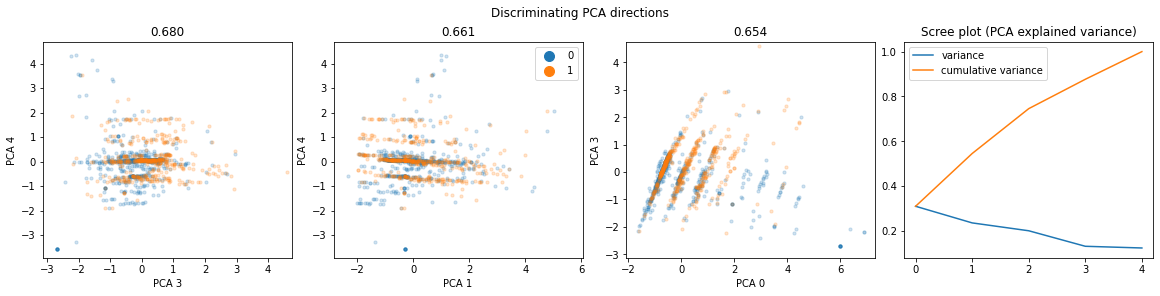

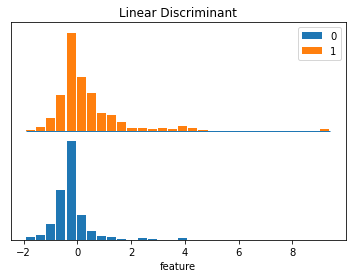

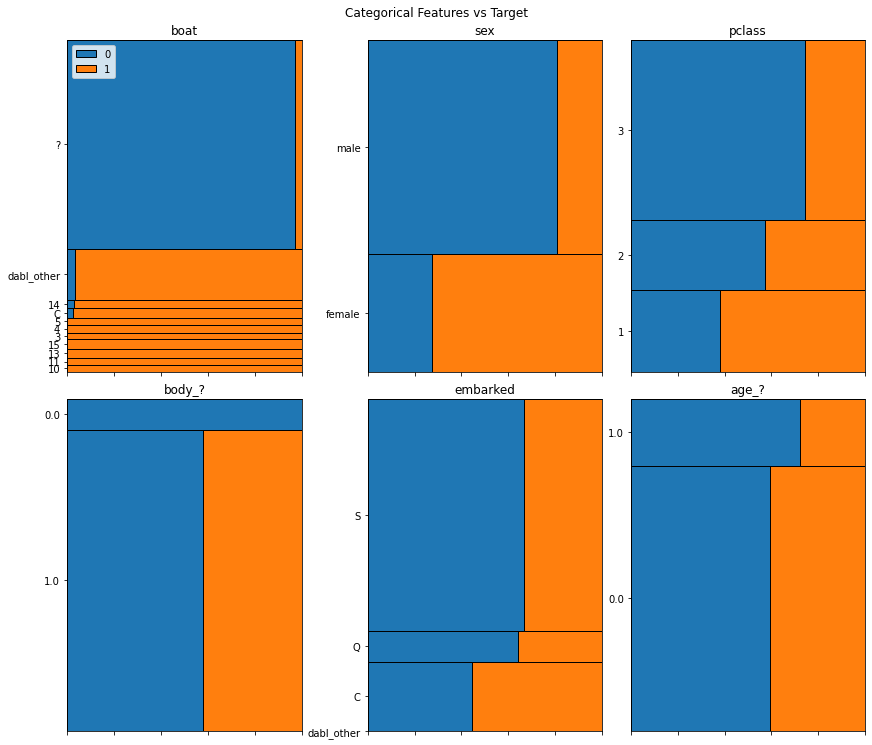

In [24]:
dabl.plot(titanic, 'survived')

- Finally, we can find an initial model for our data. The SimpleClassifier does all the work for us. It implements the familiar scikit-learn API of fit and predict. Alternatively we could also use the same interface as before and pass the whole data frame and specify the target column.